In [1]:
from sympy import Symbol,solve
import numpy as np
import matplotlib.pyplot as plt
import random

%matplotlib inline
r_m=76.2
beta_T=0.82
h_0=2.46
c=0.05
x_f=26.6
beta_f=0.28
q_f=0.83
A=3.55
beta_g=beta_f
x_g=x_f
p=1
N=500

In [2]:
# Structral connectivity matrix

#Firing rate pattern
xi_pattern=np.random.normal(0,1,size=(p,N))
r_pattern=r_m/(1+np.exp(-beta_T*(xi_pattern-h_0)))
C=np.zeros((N,N),dtype='int8')
for i in range(N):
    for j in range(N):
        if random.uniform(0,1)<c:
            C[i,j]=1

[[ 9.92439212 11.7937856  15.72985974  9.56478999  8.11336043 11.04650125
   6.38601282 14.141383    7.76721161 15.48452453  5.70779791  5.76380004
   6.93395147  7.69872696  5.54235799 10.18695109  6.31038841  4.2214263
   3.56057958  6.30355425 20.35508572 25.6845836   6.05098016 20.0189808
  25.29545967  3.02737464 13.44105938  4.09360019  9.66896992  4.37270131
   5.91235073 25.29648301  4.5910644  13.83665873 25.86875293  6.72815379
   9.68435561  5.28894198  9.5961822  20.25402071  9.44280509 15.15622951
  11.26272305 11.52797326  9.94994228 12.29527437  5.86855858  6.98901796
   8.99792094  4.17896716  6.95996753  2.48616557 14.6509135   4.45594855
  10.92010768 23.78042526 15.78530128  4.9779049  11.17392394 19.47598576
  21.11679132 18.84335105 28.81297041  6.01357273  4.38613755  7.67895642
  13.21147566  0.81864658  5.50460417 12.10897026  5.48530512  4.52631664
  18.58451474  4.1205717   4.50306227 13.65130909  4.56124998  9.83364147
   8.77202041 27.16545927  1.89876929  7

In [3]:
#x = Symbol('x')
#def func(z):
#    I=np.exp(-z**2/2)*(2*x-1+np.tanh(beta_g*(r_m/(1+np.exp(-beta_T*(z-h_0)))-x_g)))
#    return I
#Sum2=0
#for i in range(N):
#    Sum2=Sum2+func(xi_pattern[0,i])
#q_g=solve(Sum2,x)[0]
#print(q_g)

In [4]:
#Final connectivity matrix J
q_g=0.99
J=np.zeros((N,N))
def f(r):
    return 0.5*(2*q_f-1+np.tanh(beta_f*(r-x_f)))
def g(r):
    return 0.5*(2*q_g-1+np.tanh(beta_g*(r-x_g)))
def phi(xi):
    return r_m/(1+np.exp(-beta_T*(xi-h_0)))
#equation 2
Sum=np.zeros((N,N))
for k in range(p):
    Sum=Sum+np.dot(f(np.transpose(r_pattern[k])).reshape(N,1),g(r_pattern[k]).reshape(1,N))
J=A*C/c/N*Sum
for i in range(N):
    J[i,i]=0

In [5]:
# initial firing rate
r0=np.random.uniform(0,5,N)
#for i in range(p):
#    for j in range(N):
#        r0[j]=np.random.normal(r_pattern[i,j],1)
print(r0)

[1.88562332 2.67100981 2.56070097 0.99108692 3.86434004 0.65403464
 3.44247963 3.67176422 2.07315723 0.43430056 3.57365766 2.2758916
 4.85849258 4.64330995 0.39257673 0.54370463 4.01723919 2.3139295
 4.12017694 4.11913963 2.05751277 0.47391014 4.48583257 4.24989804
 0.47431966 3.1272368  1.30239355 1.09166309 3.00805443 0.4660499
 2.97785957 2.2796736  0.41147039 3.43760079 2.88746516 4.41503806
 0.14417469 4.71383182 1.65556584 1.58944191 3.9806946  1.99513305
 2.60392052 2.86907772 1.79591675 2.88741752 4.23783982 1.98126101
 4.00020231 4.51770339 0.3859305  3.26600414 0.30881598 4.84915756
 3.9737129  0.21785872 4.43553543 2.54905704 4.02024245 2.19516557
 4.76999313 4.5644257  3.54548887 3.97519592 1.51285922 3.65803835
 3.20312507 2.97593878 0.80750281 3.74811697 4.58085138 3.55528245
 1.21166451 2.73960651 0.78612084 3.46292984 3.88331224 4.60685332
 2.82464569 2.46934345 1.34934707 2.10230308 1.07429919 3.2810747
 4.59795723 2.2734414  3.97097944 3.15746666 4.06042795 3.87979962

In [6]:
gamma_term1=0
gamma_term2=0
for z in r_pattern[0]:
    gamma_term1=gamma_term1+np.exp(-z**2/2)/np.sqrt(2*np.pi)*(f(phi(z))**2)
for z in r_pattern[0]:
    gamma_term2=gamma_term2+np.exp(-z**2/2)/np.sqrt(2*np.pi)*(g(phi(z))**2)
gamma=A**2*gamma_term1*gamma_term2
print(gamma)

2.4354098883648776


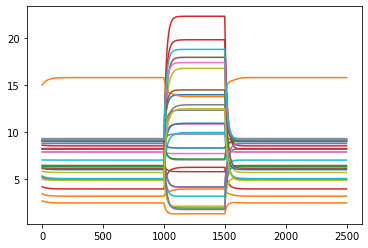

In [7]:
#Novel stimulus
t_p=150
t_max=2500+t_p
r=np.zeros((N,t_max))
tau=20
t_pre=1000+t_p
t_delay=1500+t_p
dt=1
I0=1
alpha=p/N/c
ita=np.random.normal(0,1,size=N)
I=I0*ita
r[:,0]=r0

for t in range(1,t_pre):
    xi=np.dot(J,r[:,t-1])
    r[:,t]=r[:,t-1]+(-r[:,t-1]+phi(xi))/tau*dt #equation 1
for t in range(t_pre,t_delay):
    xi=np.dot(J,r[:,t-1])
    r[:,t]=r[:,t-1]+(-r[:,t-1]+phi(I+xi))/tau*dt #equation 1
for t in range(t_delay,t_max):
    xi=np.dot(J,r[:,t-1])
    r[:,t]=r[:,t-1]+(-r[:,t-1]+phi(xi))/tau*dt #equation 1
plt.figure()
for i in range(30):
    plt.plot(range(0,t_max-t_p),r[i,t_p:t_max])
plt.savefig('Figures/novel_stimulus.png')

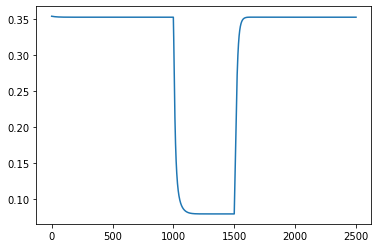

In [8]:
#Overlap
import scipy.stats
p_r=np.zeros(t_max-t_p)
for t in range(0,t_max-t_p):
    p_r[t]=scipy.stats.pearsonr(r[:,t+t_p],r_pattern[0])[0]
plt.figure()
plt.plot(range(0,t_max-t_p),p_r)
plt.savefig("Figures/overlap_novel.png")

-0.010583164122888908
-0.010582131597403668
-0.010581123065792772
-0.01058013808016232
-0.010579176196861686
-0.0105782369765435
-0.01057731998422809
-0.010576424789371009
-0.010575550965932809
-0.01057469809244999
-0.010573865752105949
-0.010573053532801559
-0.010572261027224354
-0.01057148783291597
-0.010570733552337138
-0.01056999779292979
-0.010569280167175874
-0.010568580292652754
-0.010567897792084564
-0.010567232293389562
-0.01056658342972325
-0.01056595083951695
-0.010565334166512052
-0.01056473305978959
-0.010564147173795162
-0.010563576168359344
-0.01056301970871343
-0.010562477465500599
-0.010561949114782688
-0.010561434338042294
-0.010560932822180827
-0.010560444259512091
-0.010559968347751896
-0.010559504790003513
-0.010559053294739416
-0.010558613575779165
-0.010558185352263846
-0.010557768348626869
-0.010557362294561628
-0.010556966924986004
-0.010556581980003824
-0.010556207204863577
-0.010555842349914357
-0.010555487170559354
-0.010555141427207064
-0.010554804885220044

-0.010542748766785503
-0.010542748725939959
-0.010542748686169875
-0.010542748647446924
-0.010542748609743538
-0.010542748573032876
-0.010542748537288822
-0.010542748502485913
-0.010542748468599395
-0.010542748435605147
-0.010542748403479664
-0.010542748372200065
-0.01054274834174412
-0.010542748312090126
-0.010542748283216982
-0.010542748255104106
-0.010542748227731486
-0.01054274820107964
-0.01054274817512962
-0.010542748149862904
-0.010542748125261521
-0.010542748101307956
-0.010542748077985166
-0.010542748055276534
-0.010542748033165876
-0.010542748011637447
-0.010542747990675916
-0.010542747970266388
-0.0105427479503943
-0.010542747931045504
-0.010542747912206227
-0.010542747893863046
-0.010542747876002909
-0.010542747858613083
-0.010542747841681209
-0.010542747825195205
-0.010542747809143313
-0.010542747793514133
-0.010542747778296545
-0.010542747763479677
-0.010542747749052986
-0.010542747735006214
-0.010542747721329331
-0.010542747708012619
-0.01054274769504659
-0.0105427476824

-0.010542747215676804
-0.010542747215675066
-0.010542747215673356
-0.010542747215671708
-0.010542747215670095
-0.010542747215668526
-0.010542747215666995
-0.010542747215665506
-0.010542747215664058
-0.010542747215662642
-0.010542747215661265
-0.010542747215659929
-0.010542747215658626
-0.010542747215657355
-0.010542747215656135
-0.01054274721565491
-0.010542747215653753
-0.010542747215652598
-0.010542747215651465
-0.010542747215650404
-0.010542747215649356
-0.010542747215648332
-0.010542747215647335
-0.010542747215646367
-0.010542747215645425
-0.010542747215644497
-0.010542747215643588
-0.010542747215642724
-0.010542747215641872
-0.010542747215641034
-0.010542747215640238
-0.010542747215639452
-0.01054274721563869
-0.010542747215637945
-0.010542747215637227
-0.010542747215636531
-0.010542747215635834
-0.010542747215635159
-0.01054274721563451
-0.010542747215633877
-0.010542747215633254
-0.010542747215632663
-0.010542747215632075
-0.010542747215631504
-0.010542747215630942
-0.0105427472

-0.00868070622922025
-0.008680622201775911
-0.00868054256332714
-0.00868046708870586
-0.008680395564105488
-0.008680327786517044
-0.00868026356319281
-0.008680202711136146
-0.008680145056616193
-0.008680090434706364
-0.008680038688845466
-0.008679989670420265
-0.00867994323836853
-0.00867989925880162
-0.008679857604645578
-0.008679818155299886
-0.00867978079631303
-0.008679745419074026
-0.008679711920519194
-0.008679680202853427
-0.008679650173285173
-0.00867962174377456
-0.008679594830794014
-0.008679569355100716
-0.008679545241520325
-0.008679522418741509
-0.008679500819120558
-0.008679480378495925
-0.008679461036011714
-0.008679442733950295
-0.008679425417572917
-0.008679409034968626
-0.00867939353691045
-0.008679378876718912
-0.008679365010132344
-0.008679351895183793
-0.008679339492083857
-0.008679327763109665
-0.008679316672499316
-0.008679306186351574
-0.008679296272530748
-0.008679286900576202
-0.008679278041616556
-0.00867926966828817
-0.008679261754657714
-0.00867925427614868

-0.00913968061290691
-0.009164209892146303
-0.009187458998363138
-0.00920947996438592
-0.009230323700982698
-0.009250040053243203
-0.009268677877001433
-0.009286285125441204
-0.009302908937394935
-0.009318595720380659
-0.009333391222993176
-0.00934734059277261
-0.009360488417051695
-0.009372878745491763
-0.009384555094040431
-0.00939556043088317
-0.009405937145626386
-0.009415727003460269
-0.009424971086425659
-0.009433709724169672
-0.009441982416736765
-0.009449827752020475
-0.009457283320505598
-0.009464385629869758
-0.00947117002189254
-0.009477670593945487
-0.009483920127109413
-0.00948995002269597
-0.009495790248641256
-0.009501469296900903
-0.009507014152619155
-0.009512450275478436
-0.009517801593274955
-0.009523090507422043
-0.009528337909767653
-0.009533563209836308
-0.009538784371378202
-0.009544017956934065
-0.009549279179007724
-0.009554581956378642
-0.009559938974083802
-0.00956536174564428
-0.009570860676203946
-0.00957644512537433
-0.009582123468734731
-0.009587903157110

-0.010542542652845566
-0.010542547996548638
-0.010542553200752536
-0.010542558269118034
-0.010542563205208032
-0.01054256801249025
-0.010542572694339867
-0.010542577254042127
-0.010542581694794875
-0.010542586019710885
-0.010542590231820234
-0.010542594334072678
-0.01054259832933973
-0.010542602220416813
-0.01054260601002553
-0.01054260970081543
-0.010542613295366128
-0.010542616796189206
-0.010542620205730017
-0.01054262352636946
-0.010542626760425826
-0.010542629910156401
-0.010542632977759142
-0.01054263596537433
-0.01054263887508603
-0.010542641708923666
-0.010542644468863426
-0.010542647156829798
-0.010542649774696886
-0.010542652324289706
-0.0105426548073856
-0.010542657225715448
-0.010542659580964902
-0.010542661874775601
-0.010542664108746354
-0.01054266628443425
-0.010542668403355788
-0.010542670466987931
-0.010542672476769169
-0.010542674434100514
-0.0105426763403465
-0.010542678196836143
-0.010542680004863884
-0.010542681765690488
-0.010542683480543942
-0.010542685150620299


-0.010542747207440254
-0.010542747207655346
-0.010542747207864786
-0.01054274720806871
-0.010542747208267249
-0.010542747208460594
-0.010542747208648819
-0.010542747208832115
-0.010542747209010574
-0.010542747209184338
-0.010542747209353496
-0.010542747209518234
-0.010542747209678629
-0.010542747209834799
-0.010542747209986875
-0.010542747210134918
-0.010542747210279084
-0.010542747210419437
-0.010542747210556105
-0.01054274721068917
-0.010542747210818748
-0.010542747210944897
-0.010542747211067731
-0.010542747211187337
-0.010542747211303789
-0.010542747211417161
-0.010542747211527578
-0.010542747211635051
-0.010542747211739732
-0.010542747211841634
-0.010542747211940852
-0.01054274721203746
-0.010542747212131536
-0.010542747212223126
-0.0105427472123123
-0.010542747212399119
-0.010542747212483689
-0.010542747212566008
-0.010542747212646164
-0.010542747212724201
-0.010542747212800192
-0.01054274721287417
-0.010542747212946228
-0.010542747213016368
-0.010542747213084664
-0.0105427472131

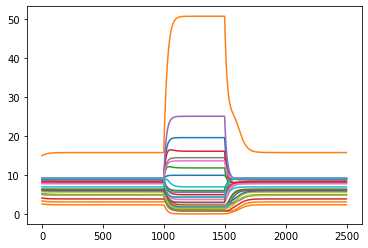

In [9]:
#Familiar Stimulus
I=I0*xi_pattern[0]
r[:,0]=r0
m=np.zeros(t_max-t_p)
for t in range(1,t_pre):
    xi=np.dot(J,r[:,t-1])
    r[:,t]=r[:,t-1]+(-r[:,t-1]+phi(xi))/tau*dt #equation 1
    if t>t_p:
        q=1/N*np.dot(g(phi(xi_pattern[0])).reshape(1,N),r[:,t].reshape(N,1))
        M=1/N*np.sum(r[:,t]**2)
        q_order=np.sum(np.exp(-np.dot(r_pattern[0].reshape(N,1),np.ones(N).reshape(1,N))**2/2)*np.exp(-np.dot(np.ones(N).reshape(N,1),r_pattern[0].reshape(1,N))**2/2)/np.sqrt(2*np.pi)/np.sqrt(2*np.pi)*g(phi(np.dot(np.ones(N).reshape(N,1),r_pattern[0].reshape(1,N))))*phi(q*A*f(phi(np.dot(np.ones(N).reshape(N,1),r_pattern[0].reshape(1,N))))+np.sqrt(alpha*gamma*M)*(np.dot(r_pattern[0].reshape(N,1),np.ones(N).reshape(1,N)))))
        M_order=np.sum(np.exp(-np.dot(r_pattern[0].reshape(N,1),np.ones(N).reshape(1,N))**2/2)*np.exp(-np.dot(np.ones(N).reshape(N,1),r_pattern[0].reshape(1,N))**2/2)/np.sqrt(2*np.pi)/np.sqrt(2*np.pi)*phi(q*A*f(phi(np.dot(np.ones(N).reshape(N,1),r_pattern[0].reshape(1,N))))+np.sqrt(alpha*gamma*M)*(np.dot(r_pattern[0].reshape(N,1),np.ones(N).reshape(1,N))))**2)
        R=np.sum(np.exp(-np.dot(r_pattern[0].reshape(N,1),np.ones(N).reshape(1,N))**2/2)*np.exp(-np.dot(np.ones(N).reshape(N,1),r_pattern[0].reshape(1,N))**2/2)/np.sqrt(2*np.pi)/np.sqrt(2*np.pi)*phi(q*A*f(phi(np.dot(np.ones(N).reshape(N,1),r_pattern[0].reshape(1,N))))+np.sqrt(alpha*gamma*M)*(np.dot(r_pattern[0].reshape(N,1),np.ones(N).reshape(1,N)))))
        m[t-t_p]=q_order/(M_order-R**2)/np.sqrt(np.sum(np.exp(-r_pattern[0]**2/2)/np.sqrt(2*np.pi)*g(phi(r_pattern[0]))**2))
        print(m[t-t_p])
for t in range(t_pre,t_delay):
    xi=np.dot(J,r[:,t-1])
    r[:,t]=r[:,t-1]+(-r[:,t-1]+phi(I+xi))/tau*dt #equation 1
    q=1/N*np.dot(g(phi(xi_pattern[0])).reshape(1,N),r[:,t].reshape(N,1))
    M=1/N*np.sum(r[:,t]**2)
    q_order=np.sum(np.exp(-np.dot(r_pattern[0].reshape(N,1),np.ones(N).reshape(1,N))**2/2)*np.exp(-np.dot(np.ones(N).reshape(N,1),r_pattern[0].reshape(1,N))**2/2)/np.sqrt(2*np.pi)/np.sqrt(2*np.pi)*g(phi(np.dot(np.ones(N).reshape(N,1),r_pattern[0].reshape(1,N))))*phi(q*A*f(phi(np.dot(np.ones(N).reshape(N,1),r_pattern[0].reshape(1,N))))+np.sqrt(alpha*gamma*M)*(np.dot(r_pattern[0].reshape(N,1),np.ones(N).reshape(1,N)))))
    M_order=np.sum(np.exp(-np.dot(r_pattern[0].reshape(N,1),np.ones(N).reshape(1,N))**2/2)*np.exp(-np.dot(np.ones(N).reshape(N,1),r_pattern[0].reshape(1,N))**2/2)/np.sqrt(2*np.pi)/np.sqrt(2*np.pi)*phi(q*A*f(phi(np.dot(np.ones(N).reshape(N,1),r_pattern[0].reshape(1,N))))+np.sqrt(alpha*gamma*M)*(np.dot(r_pattern[0].reshape(N,1),np.ones(N).reshape(1,N))))**2)
    R=np.sum(np.exp(-np.dot(r_pattern[0].reshape(N,1),np.ones(N).reshape(1,N))**2/2)*np.exp(-np.dot(np.ones(N).reshape(N,1),r_pattern[0].reshape(1,N))**2/2)/np.sqrt(2*np.pi)/np.sqrt(2*np.pi)*phi(q*A*f(phi(np.dot(np.ones(N).reshape(N,1),r_pattern[0].reshape(1,N))))+np.sqrt(alpha*gamma*M)*(np.dot(r_pattern[0].reshape(N,1),np.ones(N).reshape(1,N)))))
    m[t-t_p]=q_order/(M_order-R**2)/np.sqrt(np.sum(np.exp(-r_pattern[0]**2/2)/np.sqrt(2*np.pi)*g(phi(r_pattern[0]))**2))
    print(m[t-t_p])
for t in range(t_delay,t_max):
    xi=np.dot(J,r[:,t-1])
    r[:,t]=r[:,t-1]+(-r[:,t-1]+phi(xi))/tau*dt #equation 1
    q=1/N*np.dot(g(phi(xi_pattern[0])).reshape(1,N),r[:,t].reshape(N,1))
    M=1/N*np.sum(r[:,t]**2)
    q_order=np.sum(np.exp(-np.dot(r_pattern[0].reshape(N,1),np.ones(N).reshape(1,N))**2/2)*np.exp(-np.dot(np.ones(N).reshape(N,1),r_pattern[0].reshape(1,N))**2/2)/np.sqrt(2*np.pi)/np.sqrt(2*np.pi)*g(phi(np.dot(np.ones(N).reshape(N,1),r_pattern[0].reshape(1,N))))*phi(q*A*f(phi(np.dot(np.ones(N).reshape(N,1),r_pattern[0].reshape(1,N))))+np.sqrt(alpha*gamma*M)*(np.dot(r_pattern[0].reshape(N,1),np.ones(N).reshape(1,N)))))
    M_order=np.sum(np.exp(-np.dot(r_pattern[0].reshape(N,1),np.ones(N).reshape(1,N))**2/2)*np.exp(-np.dot(np.ones(N).reshape(N,1),r_pattern[0].reshape(1,N))**2/2)/np.sqrt(2*np.pi)/np.sqrt(2*np.pi)*phi(q*A*f(phi(np.dot(np.ones(N).reshape(N,1),r_pattern[0].reshape(1,N))))+np.sqrt(alpha*gamma*M)*(np.dot(r_pattern[0].reshape(N,1),np.ones(N).reshape(1,N))))**2)
    R=np.sum(np.exp(-np.dot(r_pattern[0].reshape(N,1),np.ones(N).reshape(1,N))**2/2)*np.exp(-np.dot(np.ones(N).reshape(N,1),r_pattern[0].reshape(1,N))**2/2)/np.sqrt(2*np.pi)/np.sqrt(2*np.pi)*phi(q*A*f(phi(np.dot(np.ones(N).reshape(N,1),r_pattern[0].reshape(1,N))))+np.sqrt(alpha*gamma*M)*(np.dot(r_pattern[0].reshape(N,1),np.ones(N).reshape(1,N)))))
    m[t-t_p]=q_order/(M_order-R**2)/np.sqrt(np.sum(np.exp(-r_pattern[0]**2/2)/np.sqrt(2*np.pi)*g(phi(r_pattern[0]))**2))
    print(m[t-t_p])
plt.figure()
for i in range(30):
    plt.plot(range(0,t_max-t_p),r[i,t_p:t_max])
plt.savefig('Figures/familiar_stimulus.png')

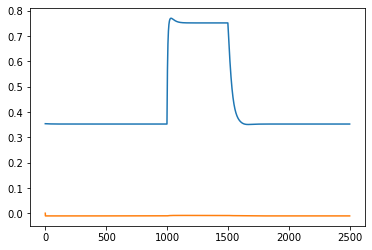

In [10]:
#Overlap
p_r=np.zeros(t_max-t_p)
for t in range(0,t_max-t_p):
    p_r[t]=scipy.stats.pearsonr(r[:,t+t_p],r_pattern[0])[0]
plt.figure()
plt.plot(range(0,t_max-t_p),p_r)
plt.plot(range(0,t_max-t_p),m)
plt.savefig("Figures/overlap_familiar.png")